In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import median

In [2]:
# Save file path to variable
cohorts = "Most-Recent-Cohorts-All-Data-Elements.csv"

In [3]:
# Read with Pandas and demonstrate raw dataframe head
cohorts_pd = pd.read_csv(cohorts)
cohorts_pd.head()

C:\Users\got_a\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6,9,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,832,833,834,835,836,837,838,840,845,846,847,848,849,850,851,853,858,859,860,861,862,863,864,865,866,867,871,872,873,874,875,876,877,878,879,880,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,910,911,912,913,914,915,916,917,918,919,923,924,925,926,927,928,929,930,931,932,936,937,938,939,940,941,943,944,945,946,949,950,951,952,953,954,956,957,958,959,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1014,1015,1016,1017,1018,1019,1022,1023,1027,1028,1029,1030,1031,1032,1035,1036,1040,1041,1042,1043,1044,1045,1047,1048,1049,1050,1053,1054,1055,1056,1057,1058,1060,1061,1062,1

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D150_4_LOANNOPELL,C150_L4_LOANNOPELL,D150_L4_LOANNOPELL,C150_4_NOLOANNOPELL,D150_4_NOLOANNOPELL,C150_L4_NOLOANNOPELL,D150_L4_NOLOANNOPELL,GT_28K_P10,GT_28K_P8,GT_28K_P6
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,195.0,NaN,NaN,0.3258,89.0,NaN,NaN,0.567,0.483,0.431
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,229.0,NaN,NaN,0.5603,630.0,NaN,NaN,0.726,0.686,0.631
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,NaN,NaN,0.5000,2.0,NaN,NaN,0.7,0.631,0.542
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,135.0,NaN,NaN,0.5606,264.0,NaN,NaN,0.755,0.71,0.649
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,55.0,NaN,NaN,0.2277,101.0,NaN,NaN,0.494,0.436,0.351


In [4]:
# Creating the new table
testscoredata = cohorts_pd[["INSTNM", "SATVRMID", "SATMTMID", "SATWRMID", "SAT_AVG", "ACTENMID", "ACTMTMID", "ACTWRMID",
                              "ACTCMMID", "C150_4"]]
testscoredf = testscoredata.rename(index=str, columns={"INSTNM":"Institution", "SATVRMID": "SAT Verbal Reasoning", "SATMTMID": "SAT Math",
                                          "SATWRMID": "SAT Writing", "SAT_AVG": "SAT Cumulative", "ACTENMID": "ACT English",
                                          "ACTMTMID": "ACT Math", "ACTWRMID": "ACT Writing", "ACTCMMID": "ACT Cumulative",
                                          "C150_4": "Graduation Rate (Within 150%)"})
testscoredf.head()

,Institution,SAT Verbal Reasoning,SAT Math,SAT Writing,SAT Cumulative,ACT English,ACT Math,ACT Writing,ACT Cumulative,Graduation Rate (Within 150%)
0,Alabama A & M University,425.0,420.0,414.0,849.0,17.0,17.0,NaN,18.0,0.2749
1,University of Alabama at Birmingham,560.0,575.0,NaN,1125.0,26.0,23.0,NaN,25.0,0.5309
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2500
3,University of Alabama in Huntsville,590.0,610.0,NaN,1257.0,29.0,26.0,NaN,28.0,0.4867
4,Alabama State University,415.0,410.0,NaN,825.0,17.0,16.0,NaN,17.0,0.2165


In [5]:
# Defining our X and Y variables to chart
x = testscoredf["Graduation Rate (Within 150%)"]
y1 = testscoredf["SAT Cumulative"]
y2 = testscoredf["ACT Cumulative"]

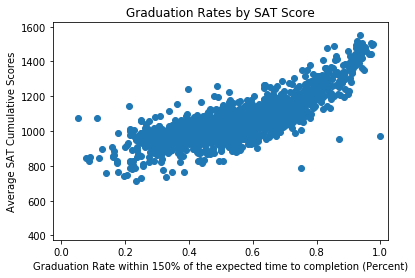

In [6]:
# Making the SAT scatterplot against Graduation Rate
plt.scatter(x,y1)
plt.title("Graduation Rates by SAT Score")
plt.xlabel("Graduation Rate within 150% of the expected time to completion (Percent)")
plt.ylabel("Average SAT Cumulative Scores")
plt.xlim(-0.025, 1.025)
plt.ylim(375, 1625)

plt.savefig("GraduationSAT.png")
plt.show()

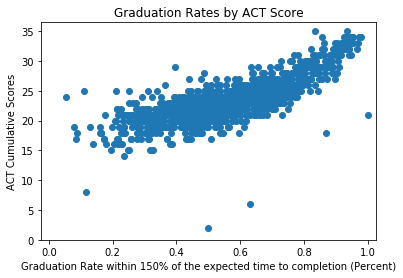

In [7]:
# Making the ACT scatterplot against Graduation Rate
plt.scatter(x,y2)
plt.title("Graduation Rates by ACT Score")
plt.xlabel("Graduation Rate within 150% of the expected time to completion (Percent)")
plt.ylabel("ACT Cumulative Scores")
plt.xlim(-0.025, 1.025)
plt.ylim(0, 36.5)

plt.savefig("GraduationACT.png")
plt.show()

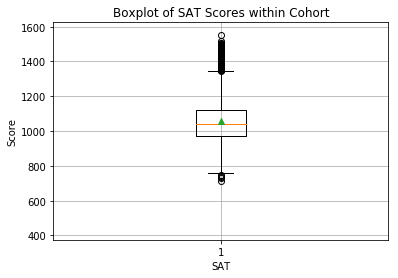

In [8]:
# Filtering the SAT dataframe to an array for boxplot analysis
SATfiltered = testscoredf["SAT Cumulative"].dropna()
arr1 = SATfiltered.values

mid1 = median(arr1) # 1040
mean1 = np.average(arr1) # 1060.23
q11 = np.percentile(arr1, 25) # 970
q31 = np.percentile(arr1, 75) # 1119.75
iqr1 = (q31 - q11) # 149.75
lower_boundary1 = q11 - (1.5 * iqr1) # 745.375
upper_boundary1 = q31 + (1.5 * iqr1) # 1344.375

# Making the SAT boxplot
plt.boxplot(arr1, showmeans=True)
plt.title("Boxplot of SAT Scores within Cohort")
plt.xlabel("SAT")
plt.ylabel("Score")
plt.xlim(0.5, 1.5)
plt.ylim(375, 1625)
plt.grid()

plt.savefig("SATBoxplot.png")
plt.show()

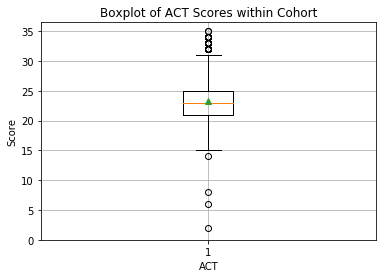

In [9]:
# Filtering the ACT dataframe to an array for boxplot analysis
ACTfiltered = testscoredf["ACT Cumulative"].dropna()
arr2 = ACTfiltered.values

mid2 = median(arr2) # 23
mean2 = np.average(arr2) # 23.29
q12 = np.percentile(arr2, 25) # 21
q32 = np.percentile(arr2, 75) #25
iqr2 = (q32 - q12) # 4
lower_boundary2 = q12 - (1.5 * iqr2) # 15
upper_boundary2 = q32 + (1.5 * iqr2) # 31

# Making the ACT boxplot
plt.boxplot(arr2, showmeans=True)
plt.title("Boxplot of ACT Scores within Cohort")
plt.xlabel("ACT")
plt.ylabel("Score")
plt.xlim(0.5, 1.5)
plt.ylim(0, 36.5)
plt.grid()

plt.savefig("ACTBoxplot.png")
plt.show()